# **Question 1**

**Round off error in long term integrations of planetary orbits**

Modelling the growth of the error over N operations as a random walk gives *Brouwer's Law*, which states that the total error after N steps will be $$ \approx \sqrt{N}\epsilon$$ where $\epsilon \sim 10^{-16}$ for a double precision float.

The *semi-implicit Euler method* involves updating the velocity and position of the planet from timestep *n* to timestep $n + 1$ according to
$$ v_{n+1} = v_n + a_n\Delta t$$
$$ x_{n+1} = x_n + v_{n+1}\Delta t$$

with r = radius of Earth from the Sun and $\mu$ is the gravitational parameter of the sun (also called $GM$).
In this scheme, the velocity is updated first using the acceleration, and then the value of position is updated using the new velocity.

### a) **Semi-Implicit Euler Method**

Write a code which uses the semi-implicit Euler method to follow the Earth's orbit around the sun. Integrate the orbit for 1 year and plot orbit in the x-y plane to check the Earth moves as expected.

Assume:
- $\mu \approx (GM)_{Sun} = 1.3271 \times 10^{20}$ N
- $1 AU = 1.496 \times 10^{11}$ m

$$F = ma = \frac{\mu m}{r^2}$$
$$ \therefore a = \frac{\mu}{r^2}$$

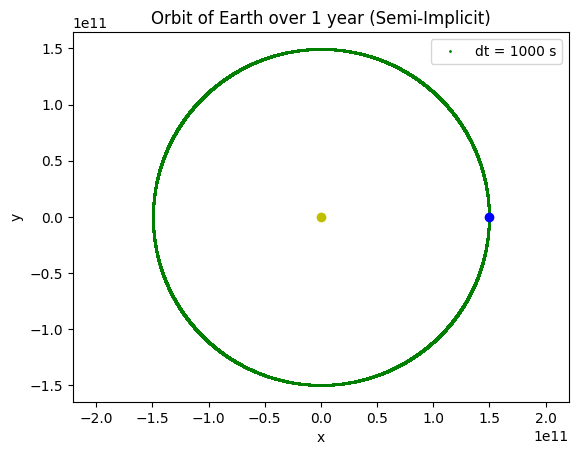

In [21]:
import numpy as np
import matplotlib.pyplot as plt

def update_v(v, a, x, dt):
    """ Update the Velocity

    Args:
        v (float): Velocity at the current time step (can be x or y velocity) Units: m/s
        a (float): acceleration at the current time step (can be x or y acceleration) Units: m/s^2
        x (float): position at the current time step (can be x or y position) Units: m
        dt (float): time step Units: s

    Returns:
        v[i+1] (float): new velocity at the next time step (can be x or y velocity) Units: m/s
    """    
    return v - a*x*dt

def update_x(x, v, dt):
    """ Update the Position

    Args:
        x (float): position at the current time step (can be x or y position) Units: m
        v (float): UPDATED velocity at the next time step (can be x or y velocity) Units: m/s
        dt (float): time step Units: s

    Returns:
        x[i+1] (float): new position at the next time step (can be x or y position) Units: m
    """    
    return x + v*dt

def e_k(vx, vy):
    """ Calculate the Kinetic Energy of the Earth at a given velocity

    Args:
        vx (float): x-component of the velocity Units: m/s
        vy (float): y-component of the velocity Units: m/s

    Returns:
        (float) kinetic energy of the Earth at a given velocity Units: Joules
    """    
    # Calculate the 
    m_earth = 5.972 * (10**24) # kg
    return 0.5 * m_earth * (vx**2 + vy**2)

def e_grav(mu, r):
    """ Calculate the Gravitational Potential Energy of the Earth at a given radius

    Args:
        mu (float): Gravitational Parameter Units: m^3/s^2
        r (float): radius of the Earth Units: m

    Returns:
        (float) gravitational potential energy of the Earth at a given radius Units: Joules
    """    
    m_earth = 5.97219*10**24 # kilograms
    return mu*m_earth/r # Joules

def orbit(dt, plot = False, explicit = False):
    """ Calculate the orbit of the Earth around the Sun

    Args:
        dt (float): time step Units: s
        plot (bool, optional): Boolean to determine if the orbit is plotted. Defaults to False to preserve runtime.
        explicit (bool, optional): Boolean to determine if the explicit or semi-implicit method is used. Defaults to False.

    Returns:
        init_e (float): initial energy of the Earth at start of orbit Units: Joules
        final_e (float): final energy of the Earth at end of orbit Units: Joules
    """    
    # Set Up Variables
    gm_Sun = 1.3271 * (10**20) # Newtons, also an approximation of mu for the Sun in m^3/s^2
    init_rad = 1.496 * (10**11) # Metres, initial radius of the Earth from the Sun

    a = gm_Sun/init_rad**2 # m/s^2, initial acceleration of the Earth towards the Sun

    t = 365.256 * 24 * 60 * 60 # Seconds per year
    n = int(t/dt) # number of steps

    # Set Up Arrays
    x = np.zeros(n)
    y = np.zeros(n)
    vx = np.zeros(n)
    vy = np.zeros(n)
    init_theta = 0 # initial angle between the x-axis and the Earth's position vector

    vy[0] = np.sqrt(a*init_rad) # all of the initial velocity is in the y-direction
    x[0] = init_rad # initial x-position of the Earth is at the radius

    # iterative versions
    rad = init_rad
    theta = init_theta

    for i in range(n - 1):
        # recalculate radius and acceleration just in case energy has been lost
        rad = np.sqrt(x[i]**2 + y[i]**2)
        a = gm_Sun/rad**2 # m/s^2

        if explicit == False:
            # Use semi-implicit method
            vx[i + 1] = update_v(vx[i], a, np.cos(theta), dt)
            vy[i + 1] = update_v(vy[i], a, np.sin(theta), dt)

            x[i + 1] = update_x(x[i], vx[i + 1], dt)
            y[i + 1] = update_x(y[i], vy[i + 1], dt)
        else:
            # Use explicit method
            vx[i + 1] = update_v(vx[i], a, np.cos(theta), dt)
            vy[i + 1] = update_v(vy[i], a, np.sin(theta), dt)

            x[i + 1] = update_x(x[i], vx[i], dt)
            y[i + 1] = update_x(y[i], vy[i], dt)

        # Recalculate theta
        theta = np.arctan2(y[i+1], x[i+1])
    
    # Calculate the initial and final energies
    init_e = e_k(vx[0], vy[0]) + e_grav(gm_Sun, rad)
    final_e = e_k(vx[-1], vy[-1]) + e_grav(gm_Sun, np.sqrt(x[-1]**2 + y[-1]**2))

    if plot == True:
        # Only plot if specified
        plt.plot(x, y, 'go', markersize = 1, label = f'dt = {dt} s')
        plt.plot(0, 0, 'yo')        #yellow marker for the sun
        plt.plot(x[0], 0, 'bo')  #dark blue marker for earth's initial position
        plt.axis('equal')
        plt.xlabel ('x')
        plt.ylabel ('y')
        plt.legend()
        if explicit == False:
            plt.title("Orbit of Earth over 1 year (Semi-Implicit)")
        else:
            plt.title("Orbit of Earth over 1 year (Explicit)")

    return init_e, final_e

# Run the orbit function
timestep = 1000
__ = orbit(timestep, plot = True)


### b) **Fractional Energy Change**

Using different timesteps $\Delta t$ ranging from $\Delta t = 0.1$ years to $\approx 10^{-9}$ years $(\approx 0.04$ seconds), plot the fractional energy change $\frac{\Delta E}{E}$ against timestep $\Delta t$ and number of steps $N$.
$$\frac{\Delta E}{E} = \frac{E_{final} - E_{initial}}{E_{initial}}$$
$$E = E_{grav} + E_{kinetic} =\frac{GMm}{r} + {\frac{1}{2} mv^2} \approx \frac{\mu m}{r} + \frac{1}{2} mv^2$$

In [14]:
# Initial dt (Warning: with dt <= 0.1, this takes a long time to run)
dt = 1

# Set up dt and energy lists
dt_list = []
e_final_list = []

# Calculate orbits for different dt values while time step is less than 1 year
while dt < (365.25*24*60*60)/100:
    dt_list.append(dt)
    ei_value, ef_value = orbit(dt, plot = False)
    e_final_list.append(ef_value)
    dt *= 10 # scale dt exponentially

 Presumably, earth should not lose any energy during it's orbit (or we would decay into the sun / get ejected into space oops) so the error is the difference between initial and final energy.

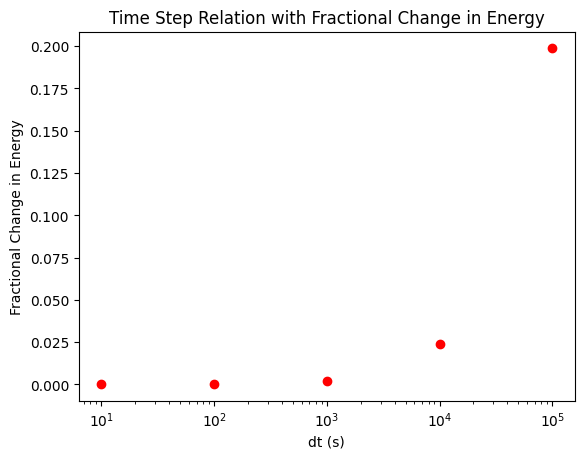

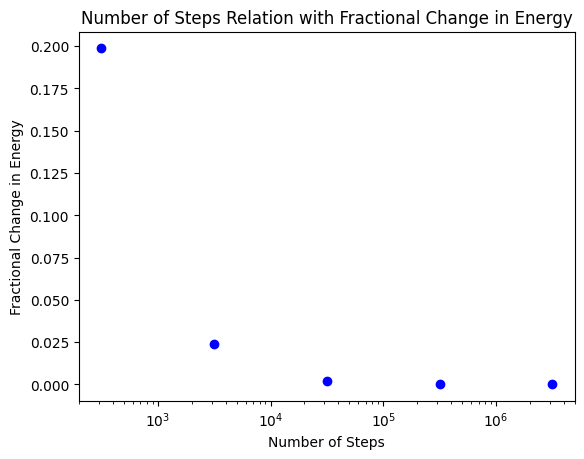

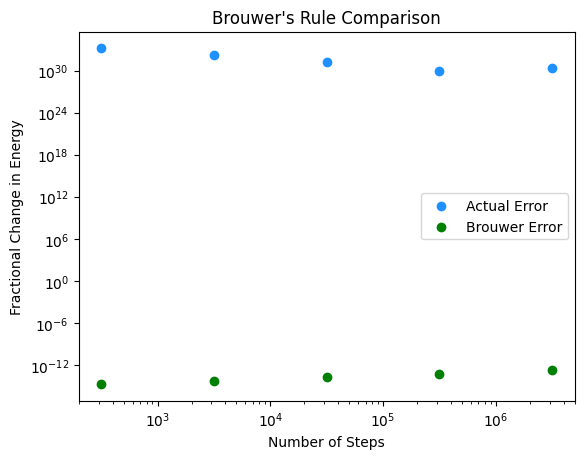

In [31]:
e_error = abs(np.array(e_final_list) - ei_value)
e_frac_change = e_error/ei_value # fractional change in energy array
dt_array = np.array(dt_list)
num_steps = ((365.25*24*60*60)/np.array(dt_array))


# Brouwer's Law
brouwer_error = np.sqrt(num_steps)*(10**(-16))

plt.figure(1)
plt.scatter(dt_array, e_frac_change, label = "Time Step (s)", c = "r")
plt.xscale('log')
plt.xlabel('dt (s)')
plt.ylabel('Fractional Change in Energy')
plt.title("Time Step Relation with Fractional Change in Energy")
#plt.legend()

plt.figure(2)
plt.scatter(num_steps, e_frac_change, label = "Number of Steps", c = "b")
plt.xscale('log')
plt.xlabel('Number of Steps')
plt.ylabel('Fractional Change in Energy')
plt.title("Number of Steps Relation with Fractional Change in Energy")
#plt.legend()

plt.figure(3)
plt.scatter(num_steps, e_error, label = "Actual Error", c = "dodgerblue")
plt.scatter(num_steps, brouwer_error, label = "Brouwer Error", c = "g")
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number of Steps')
plt.ylabel('Fractional Change in Energy')
plt.title("Brouwer's Rule Comparison")
plt.legend()


**How does it behave for large or small $\Delta t$?**

For very small $\Delta t$, the error in energy is significantly small and tends to scale linearly for most exponential increases. However, at approximately $\Delta t \approx 10^{5}$ seconds (~ 1.1 days), the error begins to get out of hand and no longer increases linearly. This should not be the case, as ~300 steps should be sufficient for a rough approximation of the Earth's orbit. This implies that there must be a slight error in my code to calculate the orbit.

**Do you see any evidence for Brouwer's Rule?**

At many steps N, Brouwer's Rule appears to be proportional, if quite distant in magnitude, from the Actual Error. I believe the actual error should much more closely correlate with the Brouwer Rule, although potentially have a steeper slope. This extreme error implies, again, that something is slightly off with my code to simulate the orbit. So, I think there should be some evidence for Brouwer's rule being an appropriate approximate of the error in energy for many steps, but I believe my plot does not show this correctly.

### c) **Explicit Euler Method**

The *explicit Euler method* involves updating the velocity and position of the planet from timestep *n* to timestep $n + 1$ according to
$$ v_{n+1} = v_n + a_n\Delta t$$
$$ x_{n+1} = x_n + v_{n}\Delta t$$
where you're using the current velocity to update the position, rather than the next velocity.

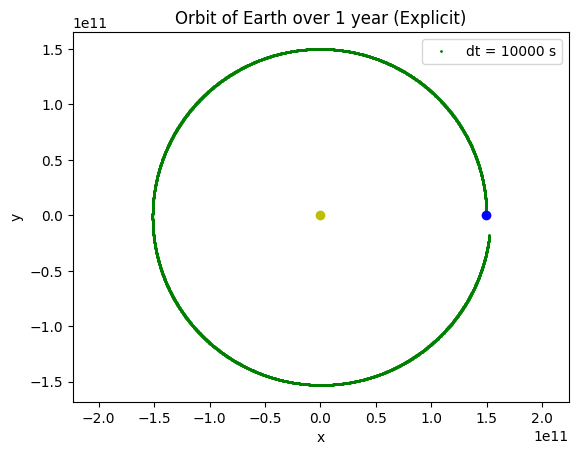

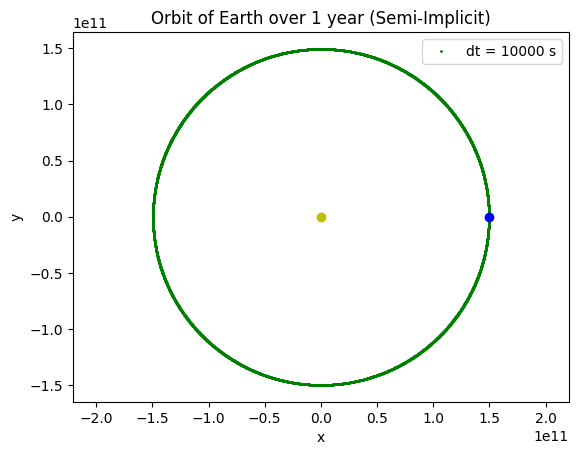

In [25]:
#Explicit Method
plt.figure(1)
__ = orbit(10000, plot = True, explicit = True)

#Semi-Implicit Method
plt.figure(2)
__ = orbit(10000, plot = True, explicit = False)

It can be seen that the explicit Euler method is *less* accurate than the semi-implicit Euler method, particularly for dt > 1000 seconds.

In [ ]:
# Initial dt (Warning: with dt <= 0.1, this takes a long time to run)
dt = 10

# Set up dt and energy lists
dt_list = []
e_final_implicit = []
e_final_explicit = []

# Calculate orbits for different dt values while time step is less than 1 year
while dt < (365.25*24*60*60)/100:
    dt_list.append(dt)
    ei_value, ef_value = orbit(dt, plot = False, explicit = True)
    e_final_explicit.append(ef_value)

    ei_value, ef_value = orbit(dt, plot = False, explicit = False)
    e_final_implicit.append(ef_value)
    dt *= 10 # scale dt exponentially

dt_array = np.array(dt_list)
num_steps = ((365.25*24*60*60)/np.array(dt_array))

#Explicit
e_error_ex = abs(np.array(e_final_explicit) - ei_value)
e_frac_change_ex = e_error/ei_value # fractional change in energy array

#Semi-Implicit
e_error_im = abs(np.array(e_final_implicit) - ei_value)
e_frac_change_im = e_error_im/ei_value # fractional change in energy array

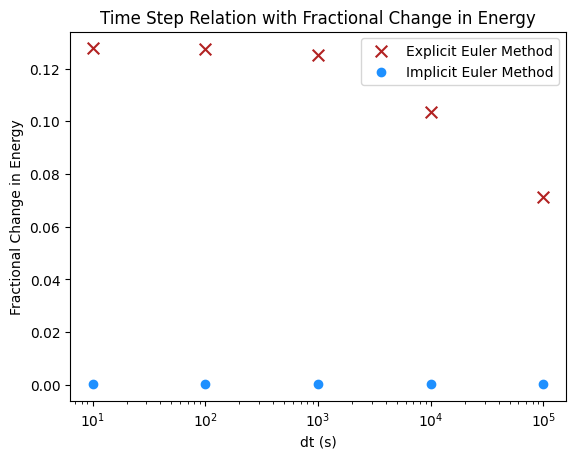

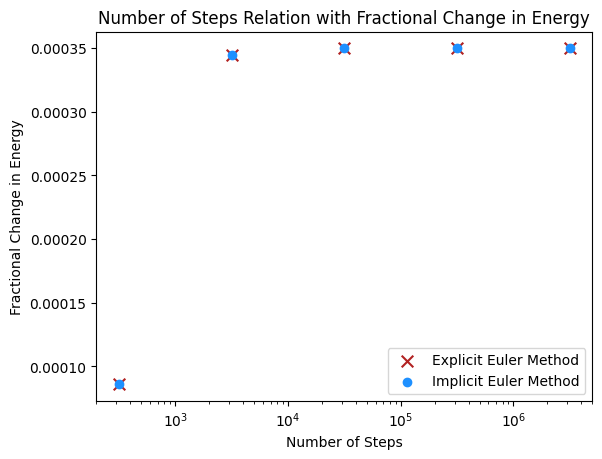

In [36]:
plt.figure(1)
plt.scatter(dt_array, e_frac_change_ex, label = "Explicit Euler Method", c = "firebrick", marker='x', s=70)
plt.scatter(dt_array, e_frac_change_im, label = "Implicit Euler Method", c = "dodgerblue")
plt.xscale('log')
plt.xlabel('dt (s)')
plt.ylabel('Fractional Change in Energy')
plt.title("Time Step Relation with Fractional Change in Energy")
plt.legend()

plt.figure(2)
plt.scatter(num_steps, e_frac_change_im, label = "Explicit Euler Method", c = "firebrick", marker='x', s=70)
plt.scatter(num_steps, e_frac_change_im, label = "Implicit Euler Method", c = "dodgerblue")
plt.xscale('log')
plt.xlabel('Number of Steps')
plt.ylabel('Fractional Change in Energy')
plt.title("Number of Steps Relation with Fractional Change in Energy")
plt.legend()

The error generated with the explicit Euler method scales identically with the number of steps than the semi-implicit method does, but very differently with the time step. With the time step, the fractional change in energy is much larger for the explicit than the implicit.

# **Question 2**

### a) **Interpolation and Thermodynamics**

The pressure and entropy per particle of an ideal gas are given by:
$$ P = nk_BT = \frac{\rho k_BT}{m}$$
$$S = k_B(\frac{5}{2} - ln(\frac{n}{nQ}))$$

where T is temperature, n is the number density of molecules, and $nQ = (mk_BT/2\pi\hbar^2)^{3/2}$ with m being the particle mass. Density ranges from $10^{-6}$ to 1 $kgm^{-3}$, and temperature ranges from 100 to 1000 K. Also, assume that m = $28m_u$, where $m_u = 1.67377 \times 10^{-27}$ kg is the atomic mass unit.

In [38]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

# Set up constants
m = 28*1.67377*10**(-27) # Mean molecular mass of air in kg
kB = 1.38064852 * (10**(-23)) # Boltzmann Constant
h_bar = 1.0545718 * (10**(-34)) # Reduced Planck Constant

def calc_pressure(T, d):
    """ Calculate the Pressure of the Earth's Atmosphere at a given temperature and density

    Args:
        T (int): Temperature of a point in Kelvin
        d (float): Density of a point in kg/m^3

    Returns:
        P (float): Pressure of a point in Pascals
    """    
    n = d/m # Number Density
    P = n*kB*T # Pressure
    return P

def calc_entropy(t, d):
    """ Calculate the Entropy of the Earth's Atmosphere at a given temperature and density

    Args:
        t (int): Temperature of a point in Kelvin
        d (float): Density of a point in kg/m^3

    Returns:
        entropy (float): S/k_B of a point
    """    
    n = d/m # Number Density
    nQ = ((m*kB*t)/(2*np.pi*h_bar**2))**(3/2) # Quantum Concentration
    entropy = (5/2 - np.log(n/nQ))
    return entropy

def frac_error(actual, approx):
    frac_change = abs(actual - approx)
    if frac_change == 0:
        return 0
    else:
        return abs(frac_change/actual)

# Generate only 15 values (to interpolate from)
n_steps = 15
t_array = np.linspace(100, 1000, n_steps) # Temperature List from 100 K to 1000 K
d_array = np.linspace(10**(-6), 1, n_steps) # Density List from 10^-6 to 1 kg/m^3

p_array = [[] for i in range(n_steps)]
s_array = [[] for i in range(n_steps)]

# Calculate the pressure and entropy at each t and d value
for i in range(len(t_array)):
    t = t_array[i]
    p = []
    s = []
    for d in d_array:
        p.append(calc_pressure(t, d))
        s.append(calc_entropy(t, d))
    p_array[i] = p
    s_array[i] = s

# Actual (Non-Interpolated) Values
full_t_array = np.linspace(100, 1000, 1000) # Full Temperature List in Kelvin
full_d_array = np.linspace(10**(-6), 1, 1000) # Full Density List in kg/m^3

full_p_array = [[] for i in range(len(full_t_array))]
full_s_array = [[] for i in range(len(full_t_array))]

for i in range(len(full_t_array)):
    t = full_t_array[i]
    p = []
    s = []
    for d in full_d_array:
        p.append(calc_pressure(t, d))
        s.append(calc_entropy(t, d))
    full_p_array[i] = p
    full_s_array[i] = s

# Interpolate 1000 points between the 15 values
interp_p_spline = sc.interpolate.RectBivariateSpline(d_array, t_array, p_array)
interp_p_array = interp_p_spline(full_d_array, full_t_array)

interp_s_spline = sc.interpolate.RectBivariateSpline(d_array, t_array, s_array)
interp_s_array = interp_s_spline(full_d_array, full_t_array)

# Calculate Fractional Error
p_frac_error = [[] for i in range(len(full_p_array))]
s_frac_error = [[] for i in range(len(full_s_array))]

for row_num in range(len(full_p_array)):
    temp_p = []
    temp_s = []

    for col_num in range(len(full_p_array[row_num])):
        # Passing in the actual and interpolated values
        temp_p.append(frac_error(full_p_array[row_num][col_num], interp_p_array[row_num][col_num]))
        temp_s.append(frac_error(full_s_array[row_num][col_num], interp_s_array[row_num][col_num]))
    
    p_frac_error[row_num] = temp_p
    s_frac_error[row_num] = temp_s

p_frac_error = np.array(p_frac_error)
s_frac_error = np.array(s_frac_error)

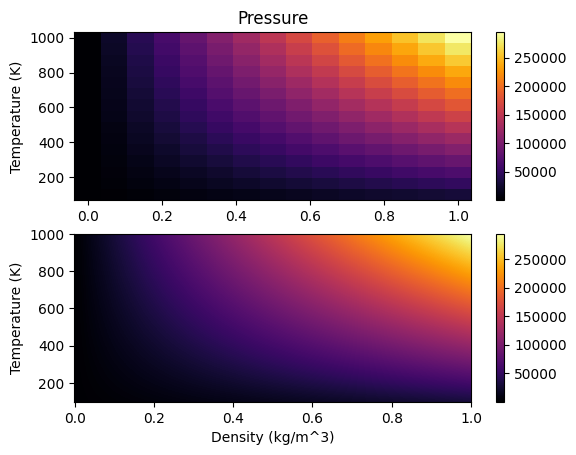

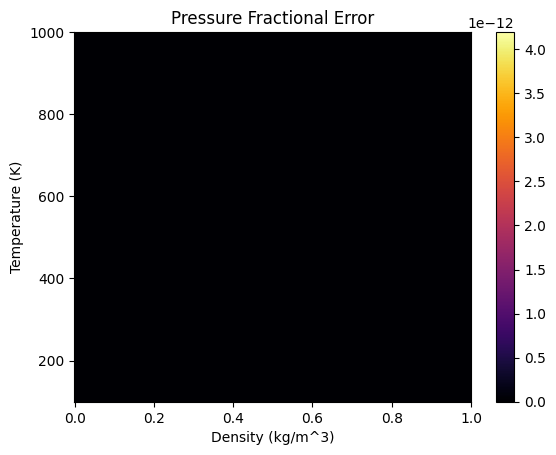

In [51]:
# Pressure Plots
mean_p_frac_error = np.mean(p_frac_error.flatten())
max_p_frac_error = mean_p_frac_error + 2*np.std(p_frac_error.flatten())

plt.figure(1)

plt.subplot(311)
plt.title("Pressure")
plt.ylabel("Temperature (K)")
plt.pcolormesh(d_array, t_array, p_array, cmap = "inferno")
plt.colorbar()

plt.subplot(313)
plt.pcolormesh(full_d_array, full_t_array, interp_p_array, cmap = "inferno")
plt.xlabel("Density (kg/m^3)")
plt.ylabel("Temperature (K)")
plt.colorbar()

plt.figure(2)
plt.pcolormesh(full_d_array, full_t_array, p_frac_error, cmap = "inferno")
plt.title("Pressure Fractional Error")
plt.xlabel("Density (kg/m^3)")
plt.ylabel("Temperature (K)")
plt.colorbar()

Since the P function is bilinear in $\rho$ and T, the spline interpolation fits it very well. This is why the fractional error is approximately the roundoff error, since the only error is the roundoff error.

There would be a similar result if the range was interpolated in log form, as that would be a linear relationship. The linear relationship would also be interpolated very well by the spline.

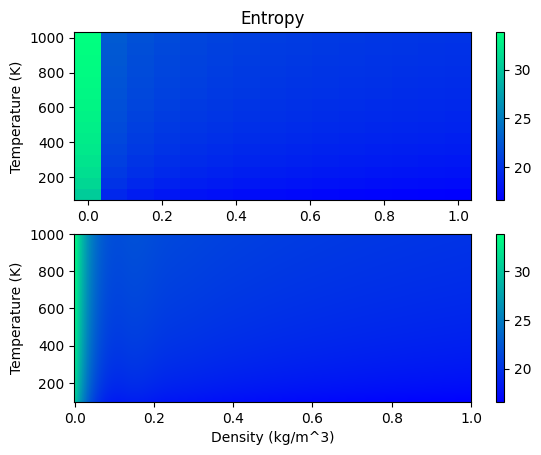

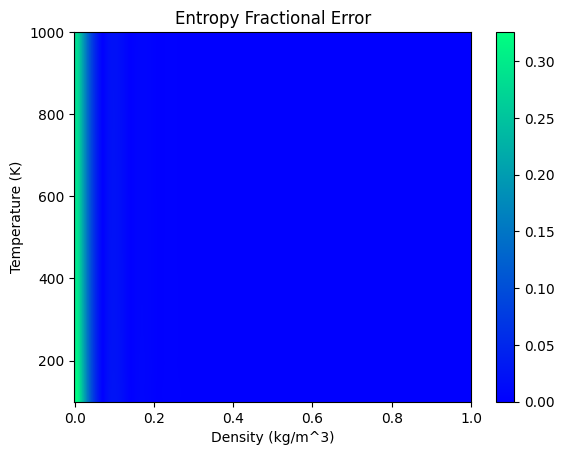

In [52]:
# Entropy Plots

mean_s_frac_error = np.mean(s_frac_error.flatten())
max_s_frac_error = mean_s_frac_error + 2*np.std(s_frac_error.flatten())

plt.figure(3)

plt.subplot(211)
plt.title("Entropy")
plt.ylabel("Temperature (K)")
plt.pcolormesh(d_array, t_array, s_array, cmap = "winter")
plt.colorbar()

plt.subplot(212)
plt.pcolormesh(full_d_array, full_t_array, interp_s_array, cmap = "winter")
plt.xlabel("Density (kg/m^3)")
plt.ylabel("Temperature (K)")
plt.colorbar()

plt.figure(4)
plt.pcolormesh(full_d_array, full_t_array, s_frac_error, cmap = "winter")
plt.title("Entropy Fractional Error")
plt.xlabel("Density (kg/m^3)")
plt.ylabel("Temperature (K)")
plt.colorbar()

Similar to the pressure, the entropy is well approximated by the spline given that it is bilinear. However, there is some error around the $\rho = 0$ mark. Because the natural log of such a small number is quite large, this is reflected from the formula. Otherwise, the error is approximately the roundoff.

### b) **Thermodynamic Consistency**

Now check to what extent your interpolation is thermodynamically consistent: In terms of the Helmholtz free energy per particle $F = E - TS$, where $E = (3/2)k_BT$ is the internal energy per particle, the pressure and entropy are given by
$$ S = - \frac{\partial F}{\partial T}|_n $$
$$ P = n^2 \frac{\partial F}{\partial n}|_T $$

This implies that the entropy and pressure must satisfy the Maxwell relation:
$$ - \frac{\partial S}{\partial n}|_T = \frac{1}{n^2} \frac{\partial P}{\partial T}|_n $$

In [40]:
dPdT = interp_p_spline.partial_derivative(dx=0,dy=1)
dSdn = interp_s_spline.partial_derivative(dx=1,dy=0)

# interp_p_spline = sc.interpolate.RectBivariateSpline(np.log10(d_array), np.log10(t_array), p_array)
# interp_p_array = interp_p_spline(np.log10(full_d_array), np.log10(full_t_array))

print(dPdT(full_d_array, full_t_array))
print("bjeabga")
print(dSdn(full_d_array, full_t_array))

[[ 32.73304271  32.73304271  32.73304271 ...  32.73304271  32.73304271
   32.73304271]
 [ 33.02793499  33.02793499  33.02793499 ...  33.02793499  33.02793499
   33.02793499]
 [ 33.32282726  33.32282726  33.32282726 ...  33.32282726  33.32282726
   33.32282726]
 ...
 [326.74064254 326.74064254 326.74064254 ... 326.74064254 326.74064254
  326.74064254]
 [327.03553481 327.03553481 327.03553481 ... 327.03553481 327.03553481
  327.03553481]
 [327.33042709 327.33042709 327.33042709 ... 327.33042709 327.33042709
  327.33042709]]
bjeabga
[[12.8445011  12.8445011  12.8445011  ... 12.8445011  12.8445011
  12.8445011 ]
 [12.76744192 12.76744192 12.76744192 ... 12.76744192 12.76744192
  12.76744192]
 [12.69078    12.69078    12.69078    ... 12.69078    12.69078
  12.69078   ]
 ...
 [ 1.35288645  1.35288645  1.35288645 ...  1.35288645  1.35288645
   1.35288645]
 [ 1.35169294  1.35169294  1.35169294 ...  1.35169294  1.35169294
   1.35169294]
 [ 1.35050227  1.35050227  1.35050227 ...  1.35050227  1.3